In [33]:
# Librerías
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

In [2]:
# Base de datos
df = pd.read_csv('BASE LIMPIA PROYECTO.csv')
df

,Lugar,Estatus,Tsunami,Relevancia,Magnitud,Estado,Longitud,Latitud,Profundidad,Fecha,Año,Mes,Dia,DiaNombre,Hora,FechaFormateada
0,"12 km NNW of Meadow Lakes, Alaska",Revisado,False,96.000000,2.50,Alaska,-149.669200,61.730200,30.100000,1990-01-01 00:22:33.990000+00:00,1990,1,1,Monday,0,01/01/1990 00:22
1,"14 km S of Volcano, Hawaii",Revisado,False,31.000000,1.41,Hawaii,-155.212333,19.317667,6.585000,1990-01-01 00:24:51.210000+00:00,1990,1,1,Monday,0,01/01/1990 00:24
2,"7 km W of Cobb, California",Revisado,False,19.000000,1.11,California,-122.806167,38.821000,3.220000,1990-01-01 00:34:43.450000+00:00,1990,1,1,Monday,0,01/01/1990 00:34
3,"11 km E of Mammoth Lakes, California",Revisado,False,15.000000,0.98,California,-118.846333,37.664333,24.425023,1990-01-01 00:58:32.130000+00:00,1990,1,1,Monday,0,01/01/1990 00:58
4,"16km N of Fillmore, CA",Revisado,False,134.000000,2.95,California,-118.934000,34.546000,16.122000,1990-01-01 01:03:44.490000+00:00,1990,1,1,Monday,1,01/01/1990 01:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218364,No definido,Revisado,False,74.009708,0.88,California,-121.699000,37.333500,7.207000,2010-03-26 10:31:44.450000+00:00,2010,3,26,Friday,10,26/03/2010 10:31
3218365,"13 km SW of Aspen Springs, California",Revisado,False,28.000000,1.36,California,-118.842500,37.483167,24.425023,1999-10-11 19:05:24.560000+00:00,1999,10,11,Monday,19,11/10/1999 19:05
3218366,"16km ESE of Anza, CA",Revisado,False,74.009708,0.17,California,-116.503833,33.515500,14.440000,2013-07-14 05:56:40.820000+00:00,2013,7,14,Sunday,5,14/07/2013 05:56
3218367,No definido,Revisado,False,284.000000,4.30,New Zealand,175.050000,-40.810000,36.000000,2002-09-02 19:04:16.100000+00:00,2002,9,2,Monday,19,02/09/2002 19:04


In [3]:
# Corrección de tipos de variables
df['Lugar'] = df['Lugar'].astype('string')
df['Estatus'] = df['Estatus'].astype('string')
df['Tsunami'] = df['Tsunami'].astype(bool)
df['Relevancia'] = df['Relevancia'].astype(float)
df['Magnitud'] = df['Magnitud'].astype(float)
df['Estado'] = df['Estado'].astype('string')
df['Longitud'] = df['Longitud'].astype(float)
df['Latitud'] = df['Latitud'].astype(float)
df['Profundidad'] = df['Profundidad'].astype(float)
df['Fecha'] = pd.to_datetime(df['Fecha'], format='mixed')
df['Año'] = df['Año'].astype(int)
df['Mes'] = df['Mes'].astype(int)
df['Dia'] = df['Dia'].astype(int)
df['DiaNombre'] = df['DiaNombre'].astype('string')
df['Hora'] = df['Hora'].astype(int)
df['FechaFormateada'] = df['FechaFormateada'].astype(object)

In [4]:
# Tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218369 entries, 0 to 3218368
Data columns (total 16 columns):
 #   Column           Dtype              
---  ------           -----              
 0   Lugar            string             
 1   Estatus          string             
 2   Tsunami          bool               
 3   Relevancia       float64            
 4   Magnitud         float64            
 5   Estado           string             
 6   Longitud         float64            
 7   Latitud          float64            
 8   Profundidad      float64            
 9   Fecha            datetime64[ns, UTC]
 10  Año              int64              
 11  Mes              int64              
 12  Dia              int64              
 13  DiaNombre        string             
 14  Hora             int64              
 15  FechaFormateada  object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(5), int64(4), object(1), string(4)
memory usage: 371.4+ MB


In [5]:
# Forma de la base
df.shape

(3218369, 16)

In [6]:
# Información estadística
df.describe()

,Relevancia,Magnitud,Longitud,Latitud,Profundidad,Año,Mes,Dia,Hora
count,3.218369e+06,3.218369e+06,3.218369e+06,3.218369e+06,3.218369e+06,3.218369e+06,3.218369e+06,3.218369e+06,3.218369e+06
mean,7.400951e+01,1.830472e+00,-1.012591e+02,3.746653e+01,2.399005e+01,2.009020e+03,6.502443e+00,1.536603e+01,1.143662e+01
std,9.901938e+01,1.214490e+00,7.700059e+01,2.040559e+01,5.320559e+01,9.438443e+00,3.429456e+00,8.661335e+00,6.903292e+00
min,0.000000e+00,0.000000e+00,-1.799997e+02,-8.442200e+01,0.000000e+00,1.990000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.400000e+01,1.000000e+00,-1.464120e+02,3.406500e+01,4.251000e+00,2.002000e+03,4.000000e+00,8.000000e+00,5.000000e+00
50%,3.500000e+01,1.560000e+00,-1.189523e+02,3.793217e+01,9.670000e+00,2.010000e+03,7.000000e+00,1.500000e+01,1.100000e+01
75%,7.400971e+01,2.210000e+00,-1.159237e+02,4.783383e+01,2.285256e+01,2.017000e+03,9.000000e+00,2.300000e+01,1.700000e+01
max,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02,2.023000e+03,1.200000e+01,3.000000e+01,2.300000e+01


In [7]:
# Variables
vars = df.columns
vars

Index(['Lugar', 'Estatus', 'Tsunami', 'Relevancia', 'Magnitud', 'Estado',
       'Longitud', 'Latitud', 'Profundidad', 'Fecha', 'Año', 'Mes', 'Dia',
       'DiaNombre', 'Hora', 'FechaFormateada'],
      dtype='object')

In [8]:
# Datos unicos por variable
for i in vars:
    datos_unicos = df[i].nunique()
    print(f'{i} = {datos_unicos}')

Lugar = 497530
Estatus = 3
Tsunami = 2
Relevancia = 1131
Magnitud = 759
Estado = 851
Longitud = 706319
Latitud = 502118
Profundidad = 71656
Fecha = 3086142
Año = 34
Mes = 12
Dia = 30
DiaNombre = 7
Hora = 24
FechaFormateada = 2760850


In [9]:
# Datos unicos en var Estatus
df['Estatus'].unique()

<StringArray>
['Revisado', 'Manual', 'Automático']
Length: 3, dtype: string

In [10]:
# Datos unicos en var Tsunami
df['Tsunami'].unique()

array([False,  True])

In [11]:
# Numero de Tsunamis
df['Tsunami'].value_counts()[True]

np.int64(1376)

2. Visualización y Distribución de Variables Individuales

In [12]:
num_var = 'Relevancia','Magnitud','Longitud','Latitud','Profundidad','Año','Mes','Dia','Hora'

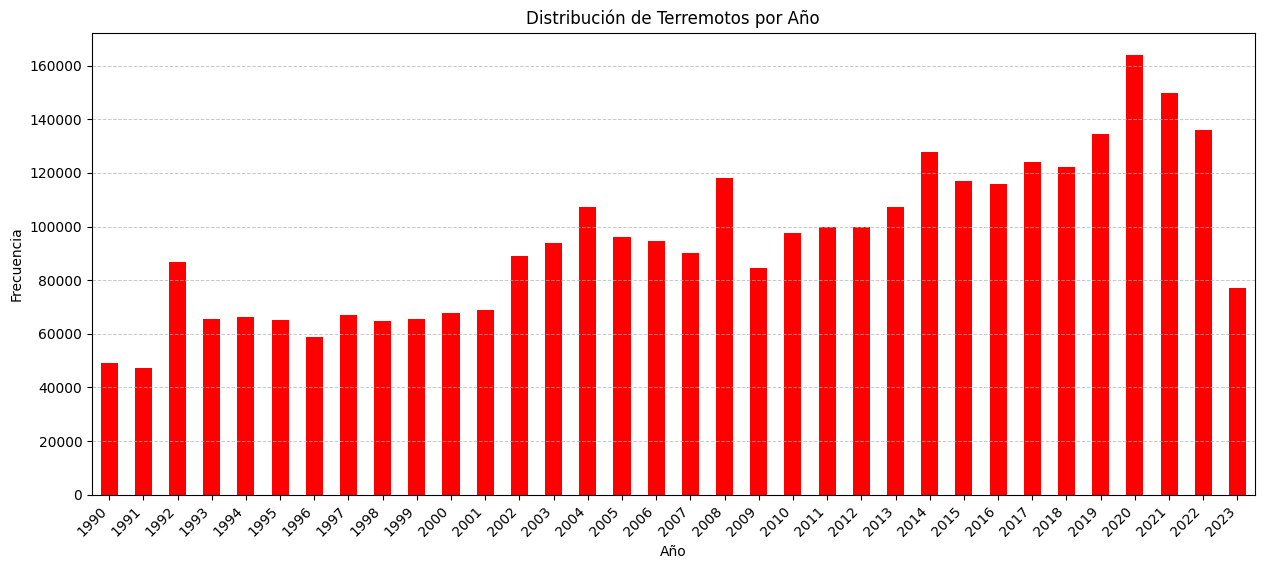

In [13]:
# Distribución de terremotos por año
plt.figure(figsize=(15, 6))

df['Año'].value_counts().sort_index().plot(kind='bar', color='red')

plt.title('Distribución de Terremotos por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45, ha='right')

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Mostrar el gráfico
plt.show()

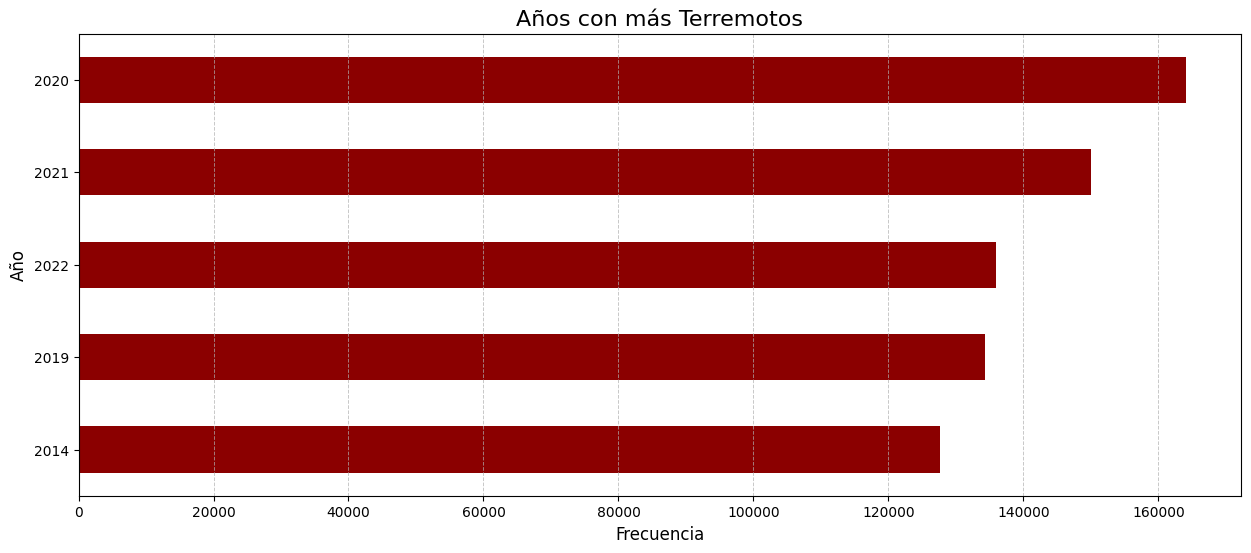

In [14]:
# Años con más terremotos
plt.figure(figsize=(15, 6))

df['Año'].value_counts().nlargest(5).plot(kind='barh', color='darkred')

plt.title('Años con más Terremotos', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Año', fontsize=12)

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

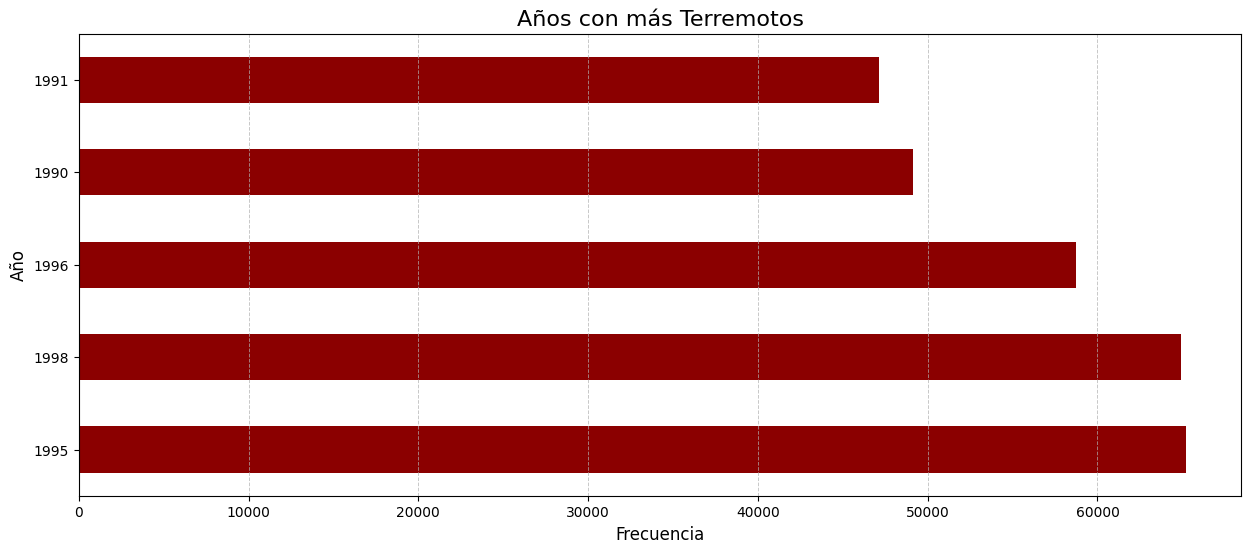

In [15]:
# Años con menos terremotos
plt.figure(figsize=(15, 6))

df['Año'].value_counts().nsmallest(5).plot(kind='barh', color='darkred')

plt.title('Años con más Terremotos', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Año', fontsize=12)

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

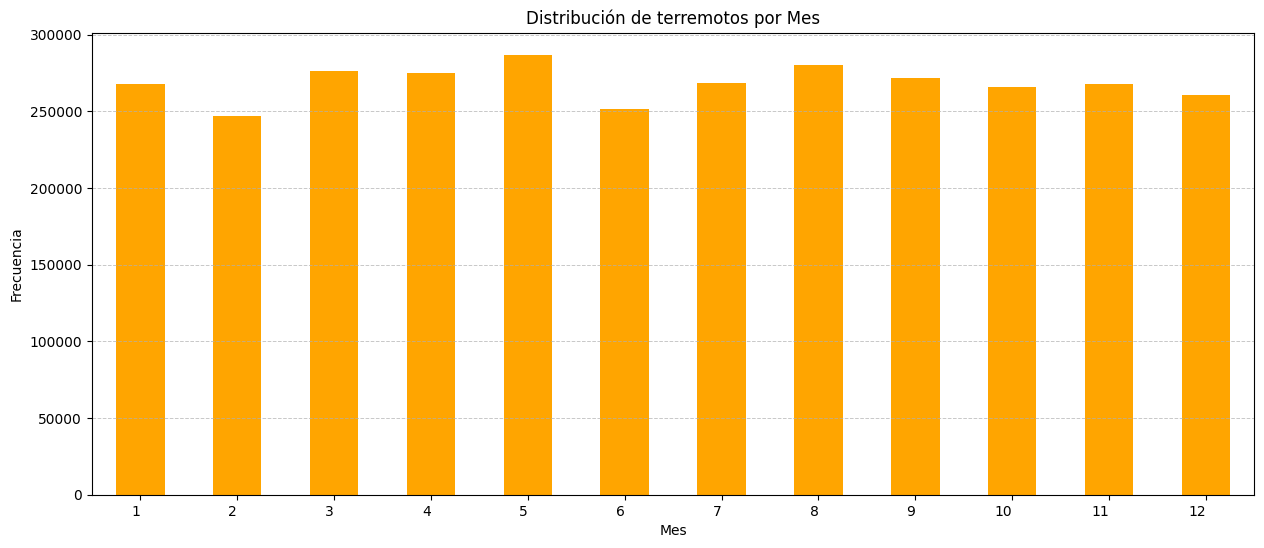

In [16]:
# Distribución de terremotos por mes

plt.figure(figsize=(15, 6))

df['Mes'].value_counts().sort_index().plot(kind='bar', color='orange')

plt.title('Distribución de terremotos por Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')

plt.xticks(rotation=0, ha='right')

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Mostrar el gráfico
plt.show()

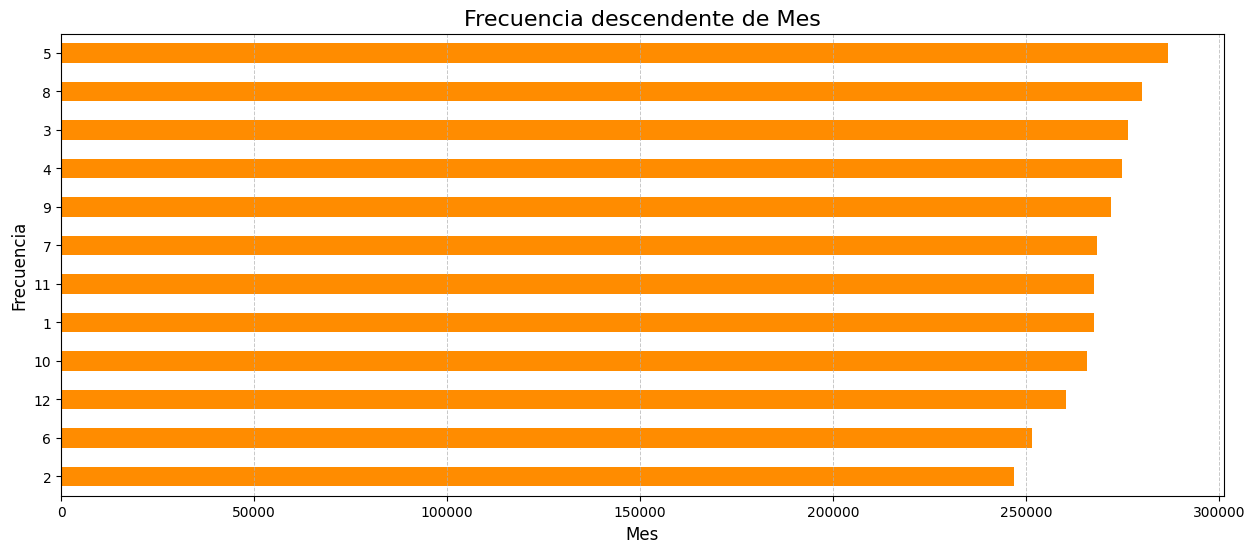

In [17]:
plt.figure(figsize=(15, 6))

df['Mes'].value_counts().nlargest(12).plot(kind='barh', color='darkorange')

plt.title('Frecuencia descendente de Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

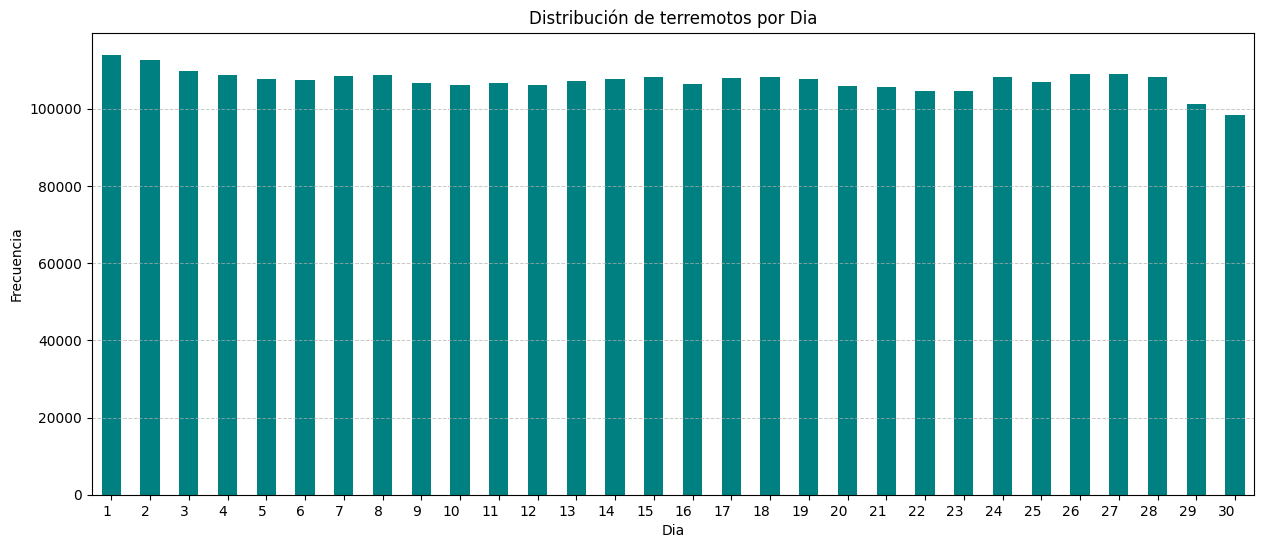

In [18]:
# Distribución de terremotos por dia

plt.figure(figsize=(15, 6))

df['Dia'].value_counts().sort_index().plot(kind='bar', color='teal')

plt.title('Distribución de terremotos por Dia')
plt.xlabel('Dia')
plt.ylabel('Frecuencia')

plt.xticks(rotation=0, ha='right')

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()

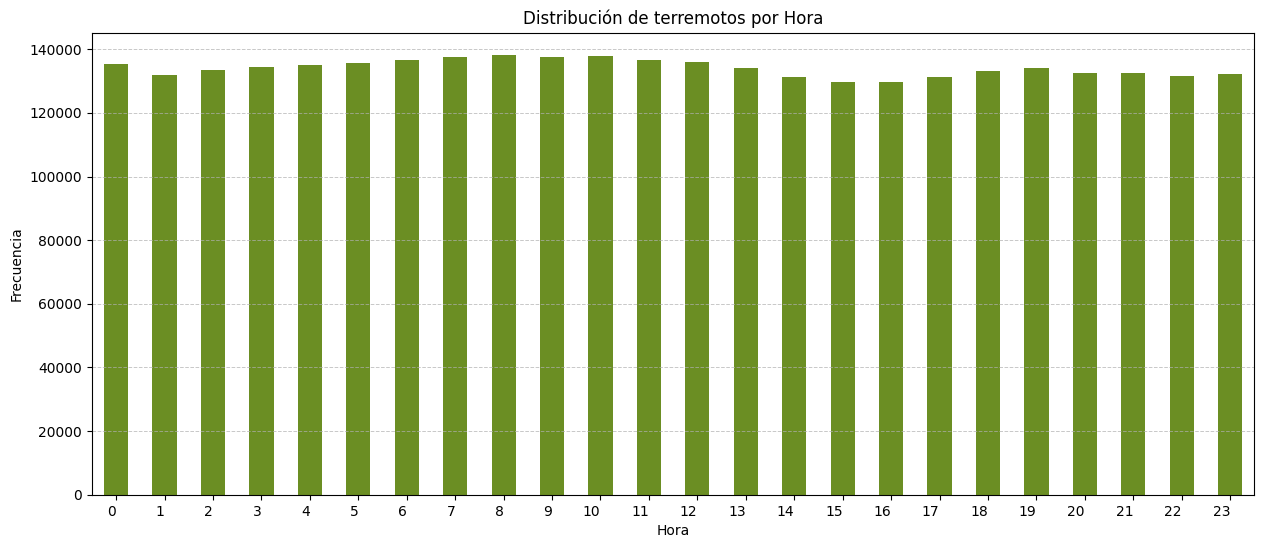

In [19]:
# Distribución de terremotos por hora
plt.figure(figsize=(15, 6))

df['Hora'].value_counts().sort_index().plot(kind='bar', color='olivedrab')

plt.title('Distribución de terremotos por Hora')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')

plt.xticks(rotation=0, ha='right')

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Mostrar el gráfico
plt.show()

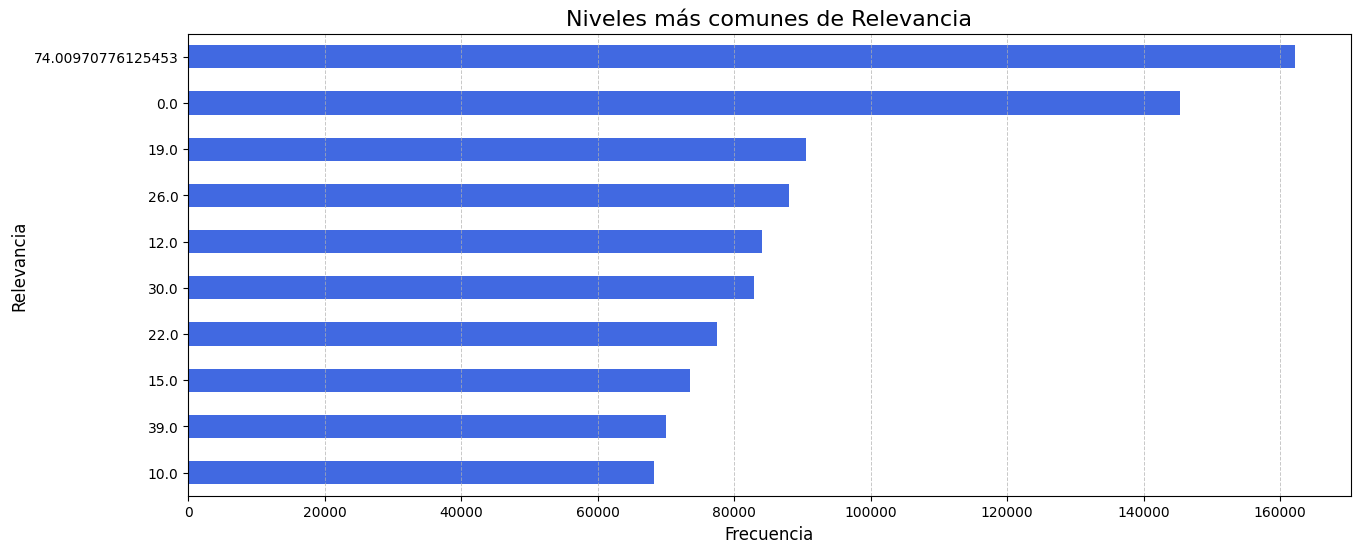

In [20]:
# Niveles más comunes de Relevancia
plt.figure(figsize=(15, 6))

df['Relevancia'].value_counts().nlargest(10).plot(kind='barh', color='royalblue')

plt.title('Niveles más comunes de Relevancia', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Relevancia', fontsize=12)

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

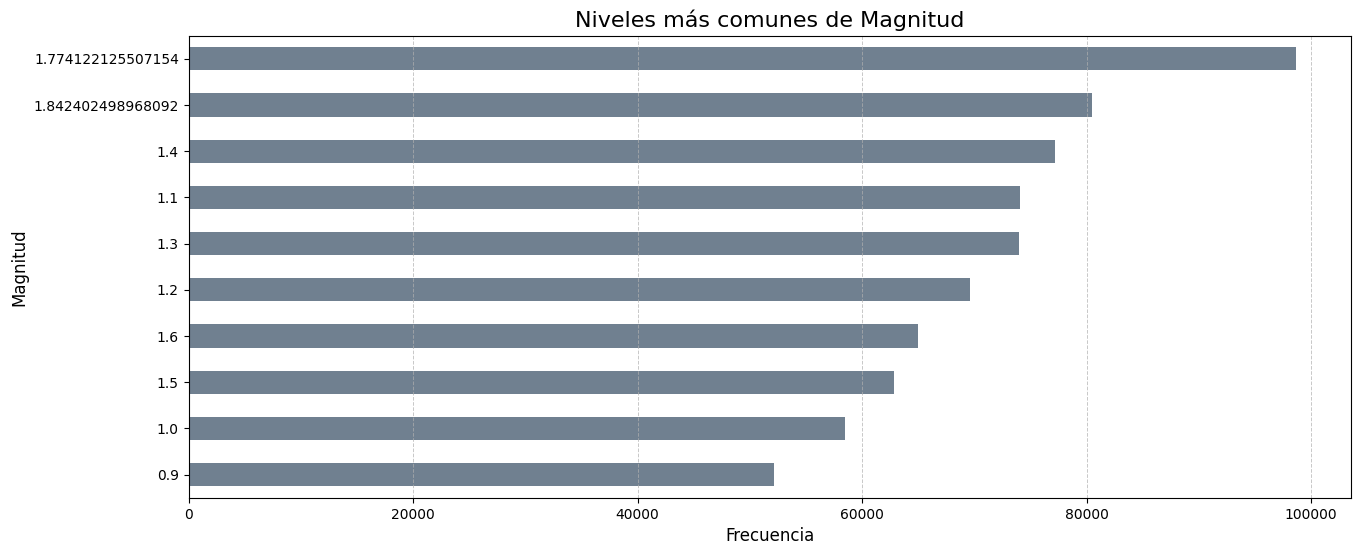

In [21]:
# Niveles más comunes de Magnitud
plt.figure(figsize=(15, 6))

# Obtener las 10 edades más comunes (ordenadas por frecuencia de mayor a menor)
df['Magnitud'].value_counts().nlargest(10).plot(kind='barh', color='slategrey')

# Personalización del gráfico
plt.title('Niveles más comunes de Magnitud', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)

# Añadir rejilla
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Invertir el eje Y para que la barra más alta esté en la parte superior
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

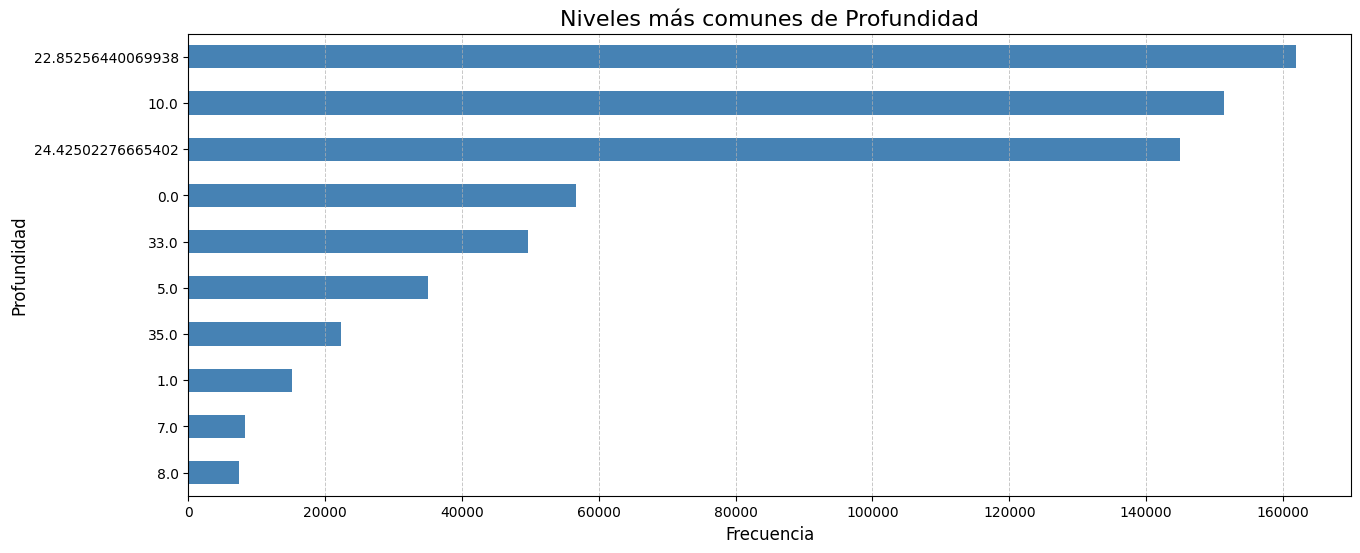

In [22]:
# Niveles más comunes de Profundidad
plt.figure(figsize=(15, 6))

df['Profundidad'].value_counts().nlargest(10).plot(kind='barh', color='steelblue')

plt.title('Niveles más comunes de Profundidad', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Profundidad', fontsize=12)

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

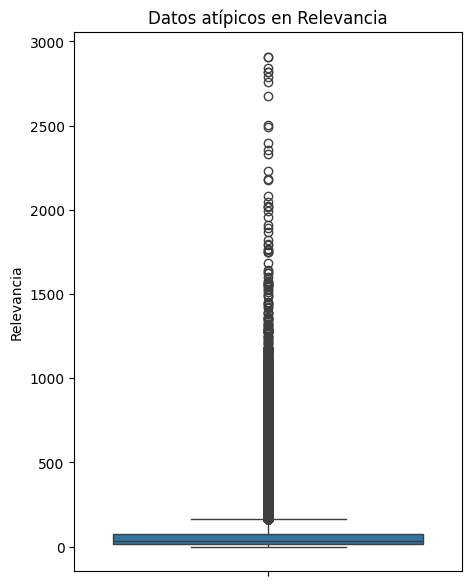

In [23]:
# Datos atípicos en Relevancia
plt.figure(figsize=(5, 7)) 
sns.boxplot(y = 'Relevancia', data = df)

plt.title('Datos atípicos en Relevancia')
plt.ylabel('Relevancia')
plt.show()

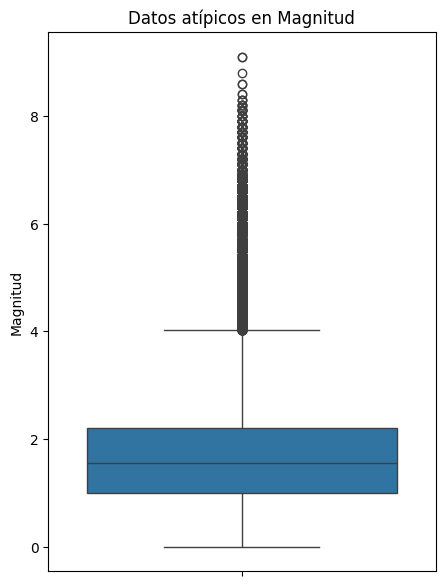

In [24]:
# Datos atípicos en Magnitud
plt.figure(figsize=(5, 7)) 
sns.boxplot(y = 'Magnitud', data = df)

plt.title('Datos atípicos en Magnitud')
plt.ylabel('Magnitud')
plt.show()

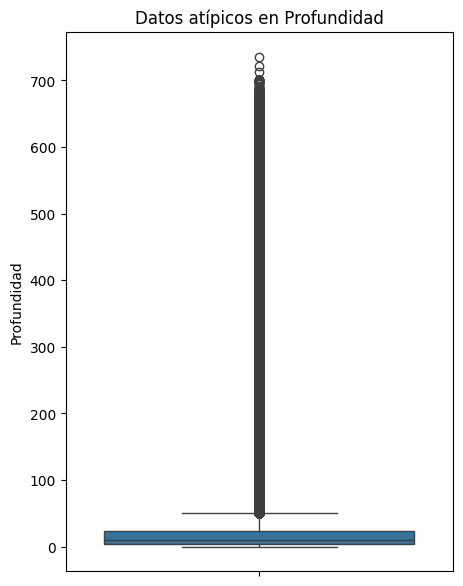

In [25]:
# Datos atípicos en Profundidad
plt.figure(figsize=(5, 7)) 
sns.boxplot(y = 'Profundidad', data = df)

plt.title('Datos atípicos en Profundidad')
plt.ylabel('Profundidad')
plt.show()

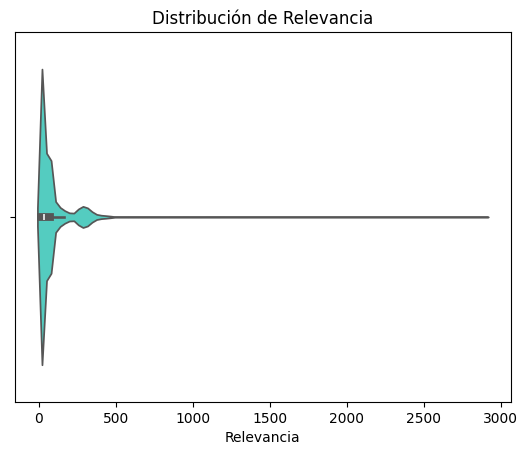

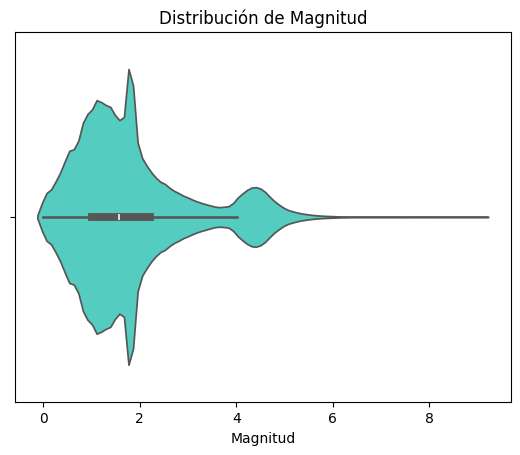

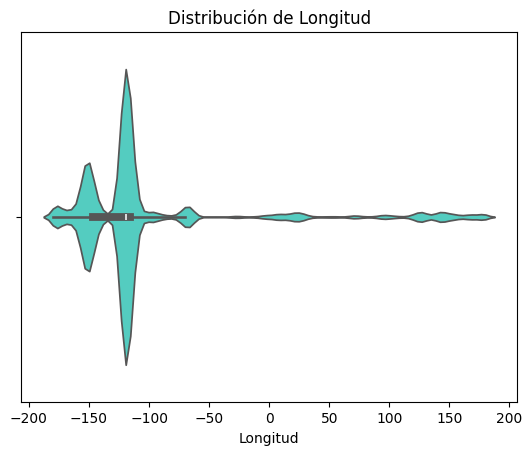

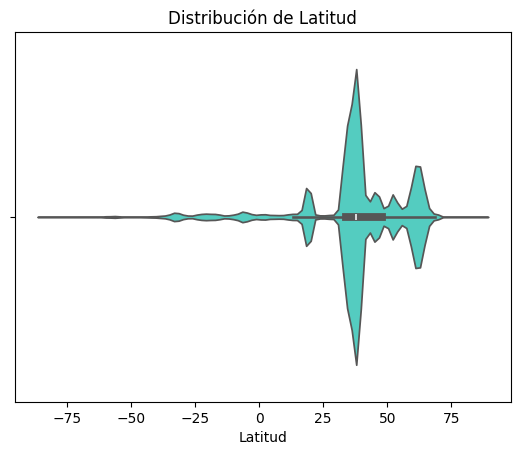

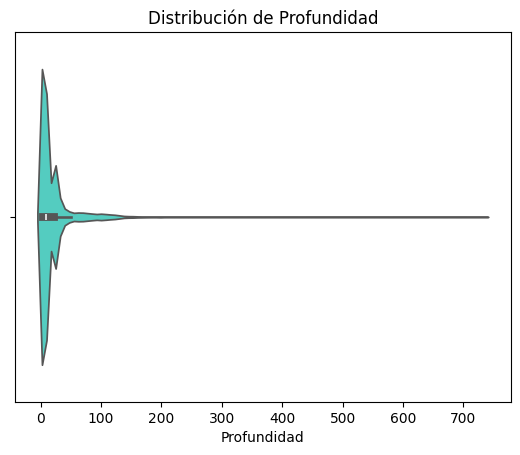

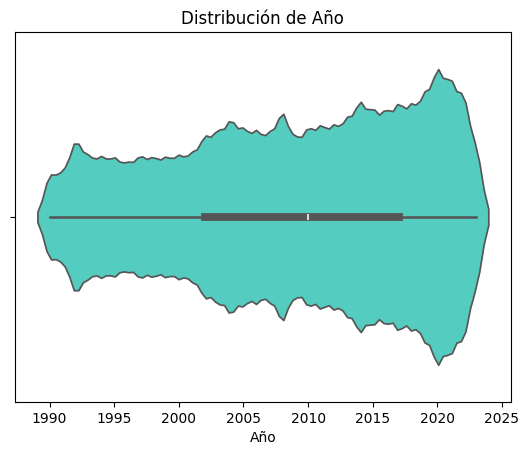

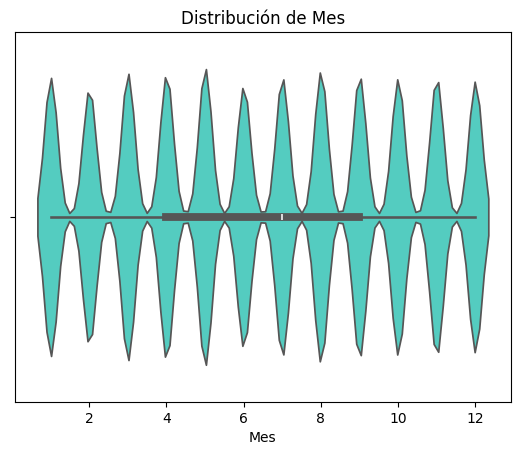

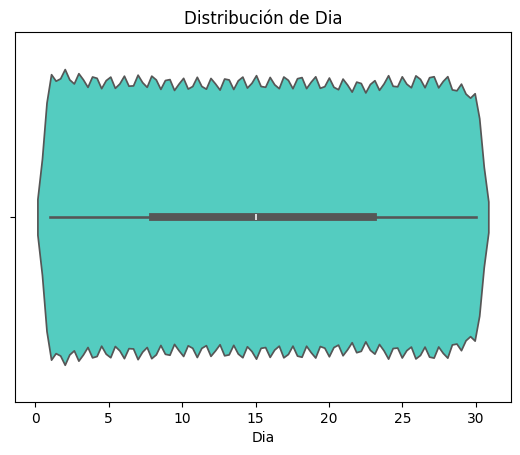

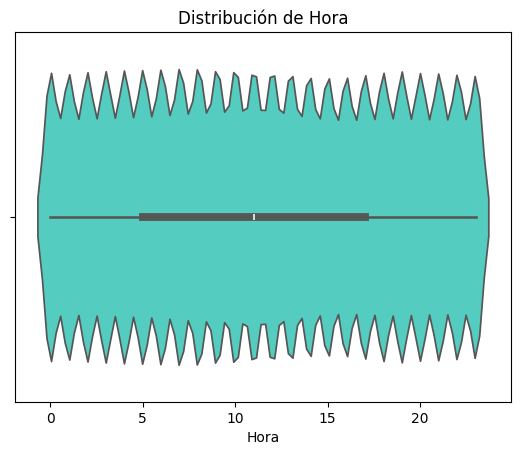

In [26]:
for i in num_var:
# Gráfico de violín para CreditScore por Tipo de Tarjeta
    sns.violinplot(x = i, data = df, color='turquoise')

# Mostrar gráfico
    plt.title(f'Distribución de {i}')
    plt.show()

In [27]:
cat_var = 'Lugar','Estatus','Tsunami','Estado','DiaNombre'

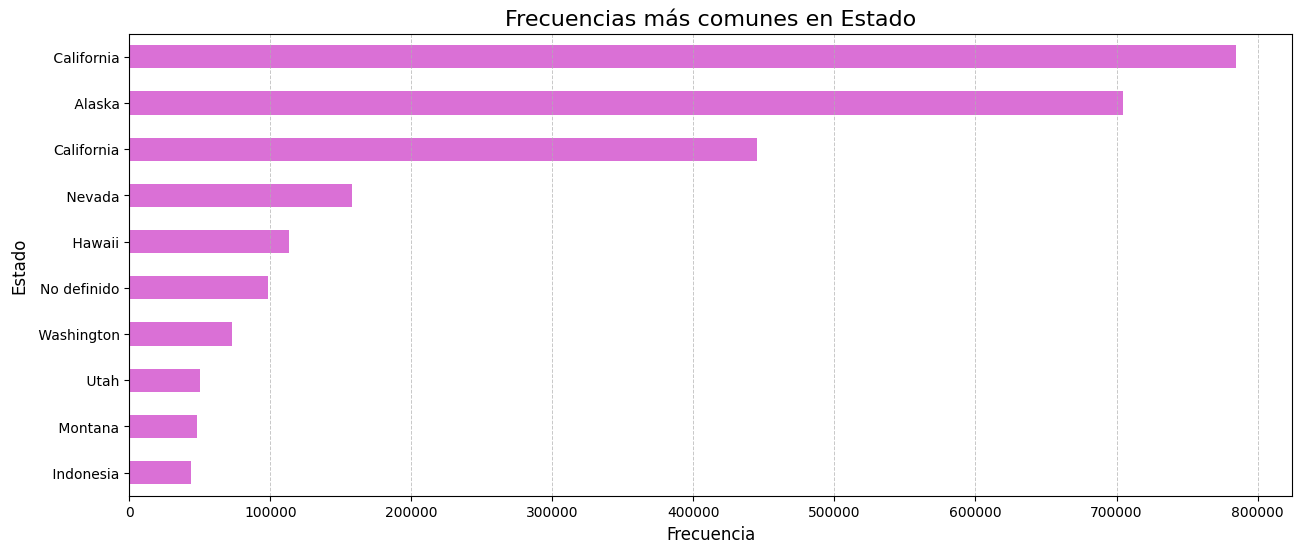

In [28]:
# Frecuencia más comun en Estado
plt.figure(figsize=(15, 6))

df['Estado'].value_counts().nlargest(10).plot(kind='barh', color='orchid')

plt.title('Frecuencias más comunes en Estado', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Estado', fontsize=12)

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

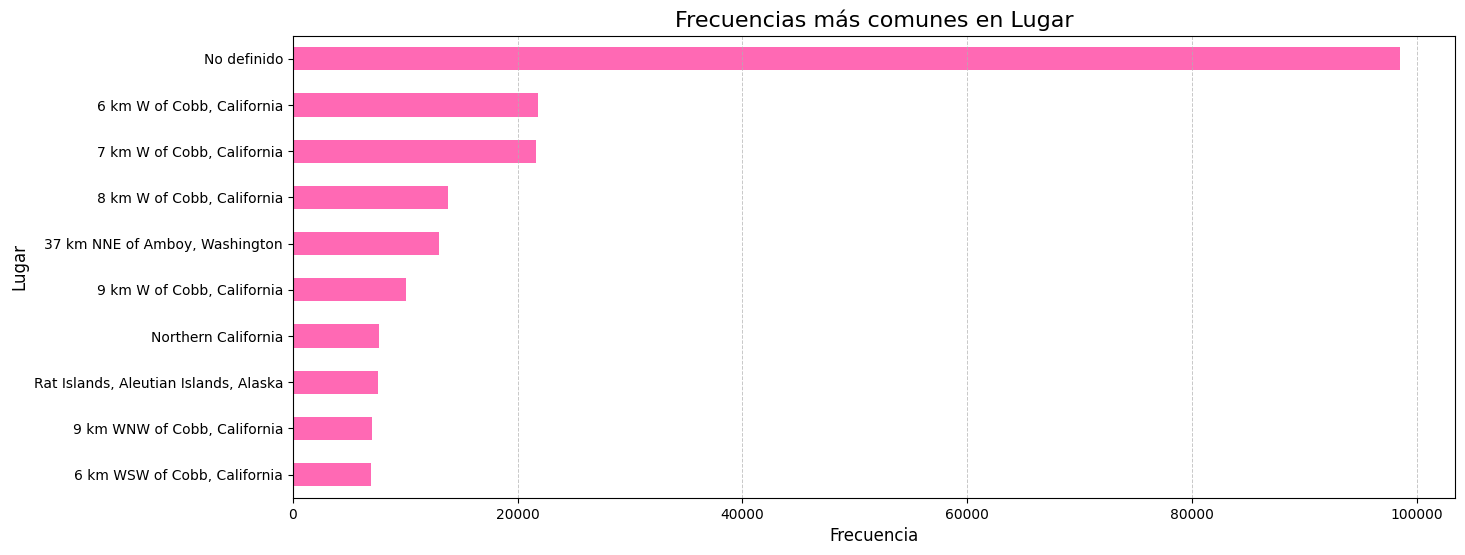

In [29]:
# Frecuencia más comun en Estado
plt.figure(figsize=(15, 6))

df['Lugar'].value_counts().nlargest(10).plot(kind='barh', color='hotpink')

plt.title('Frecuencias más comunes en Lugar', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Lugar', fontsize=12)

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

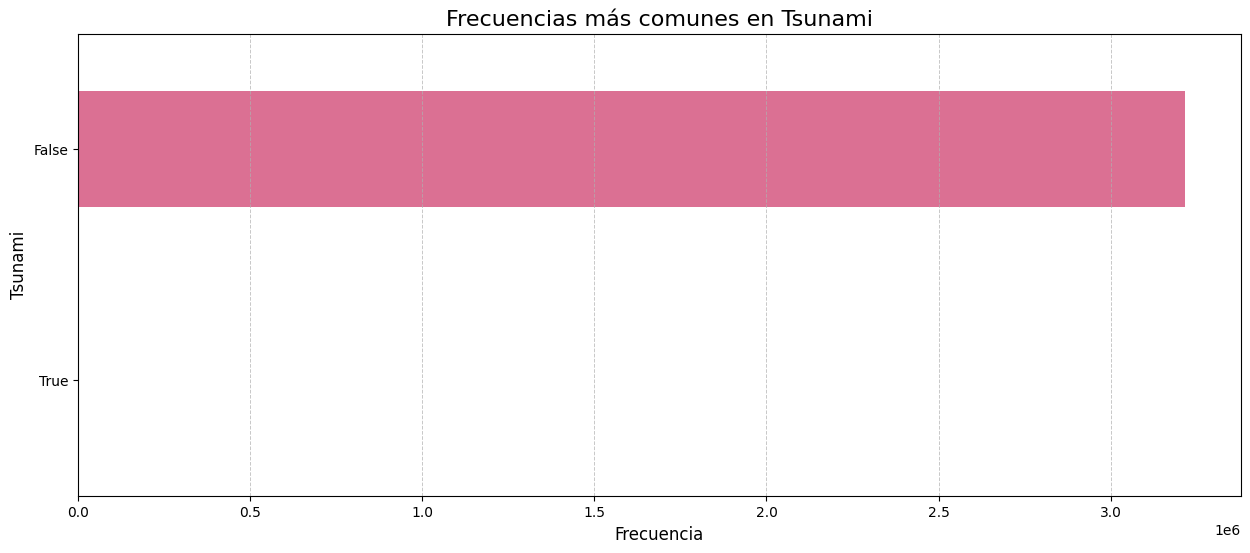

In [30]:
# Frecuencia más comun en Tsunami
plt.figure(figsize=(15, 6))

df['Tsunami'].value_counts().nlargest(10).plot(kind='barh', color='palevioletred')

plt.title('Frecuencias más comunes en Tsunami', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Tsunami', fontsize=12)

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

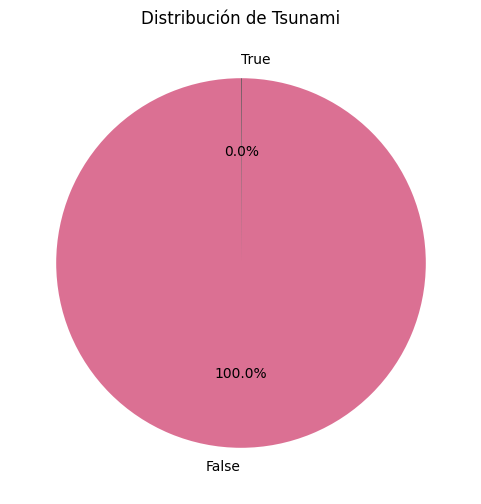

In [31]:
tsunami_counts = df['Tsunami'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(tsunami_counts, labels=tsunami_counts.index, autopct='%1.1f%%', startangle=90, colors=['palevioletred', 'black'])
plt.title('Distribución de Tsunami')
plt.show()

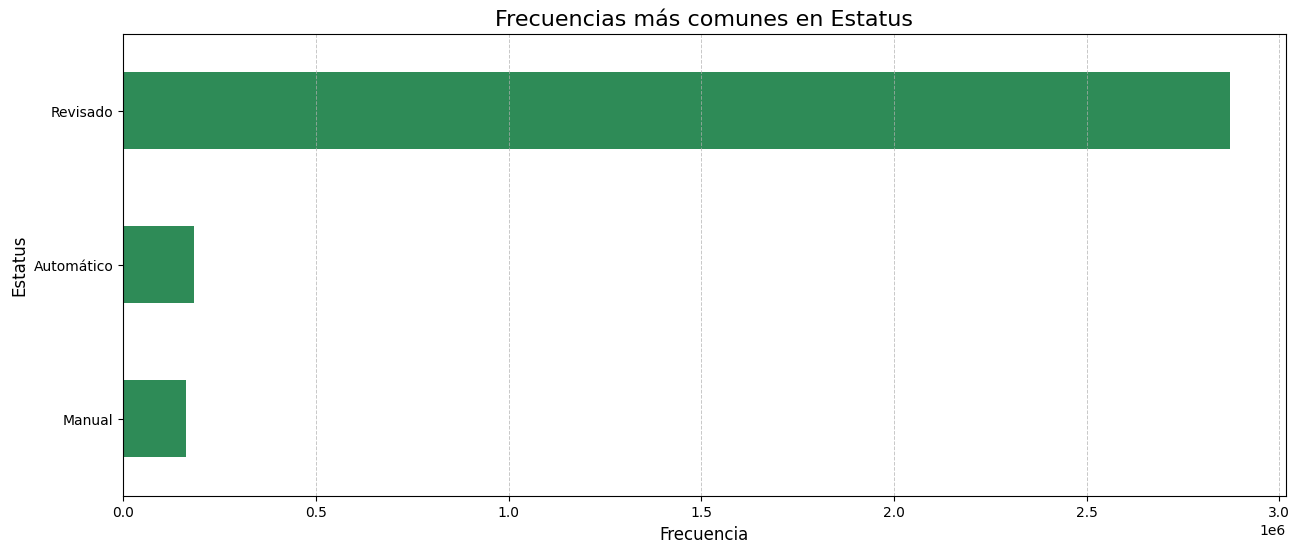

In [32]:
# Frecuencia más comun en Estatus
plt.figure(figsize=(15, 6))

df['Estatus'].value_counts().nlargest(10).plot(kind='barh', color='seagreen')

plt.title('Frecuencias más comunes en Estatus', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Estatus', fontsize=12)

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

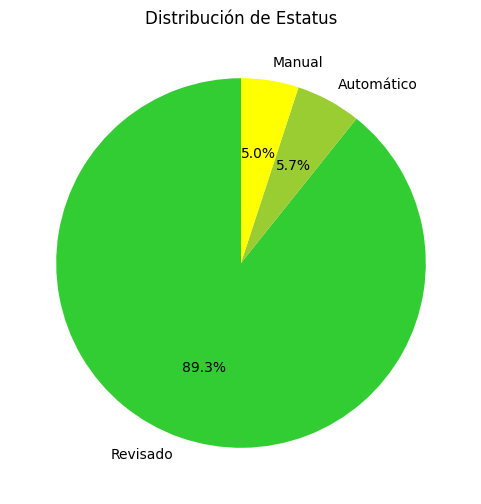

In [33]:
tsunami_counts = df['Estatus'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(tsunami_counts, labels=tsunami_counts.index, autopct='%1.1f%%', startangle=90, colors=['limegreen', 'yellowgreen','yellow'])
plt.title('Distribución de Estatus')
plt.show()

3. Correlación entre variables

In [ ]:
# Columnas numéricas
df_numeric = df[['Relevancia','Magnitud','Longitud','Latitud','Profundidad','Año','Mes','Dia','Hora']]
correlation_matrix = df_numeric.corr()
correlation_matrix

,Relevancia,Magnitud,Longitud,Latitud,Profundidad,Año,Mes,Dia,Hora
Relevancia,1.000000,0.910500,0.635221,-0.542130,0.338627,-0.077742,-0.003732,0.001459,0.013562
Magnitud,0.910500,1.000000,0.593140,-0.494950,0.338800,-0.105627,-0.002084,0.001014,0.016176
Longitud,0.635221,0.593140,1.000000,-0.457628,0.162027,-0.118519,-0.005871,0.004792,0.009076
Latitud,-0.542130,-0.494950,-0.457628,1.000000,-0.230135,0.105071,0.010198,0.000687,-0.005990
Profundidad,0.338627,0.338800,0.162027,-0.230135,1.000000,0.023178,-0.003332,0.000984,0.004241
Año,-0.077742,-0.105627,-0.118519,0.105071,0.023178,1.000000,-0.037658,-0.006926,-0.011112
Mes,-0.003732,-0.002084,-0.005871,0.010198,-0.003332,-0.037658,1.000000,0.005820,0.001041
Dia,0.001459,0.001014,0.004792,0.000687,0.000984,-0.006926,0.005820,1.000000,0.002188
Hora,0.013562,0.016176,0.009076,-0.005990,0.004241,-0.011112,0.001041,0.002188,1.000000


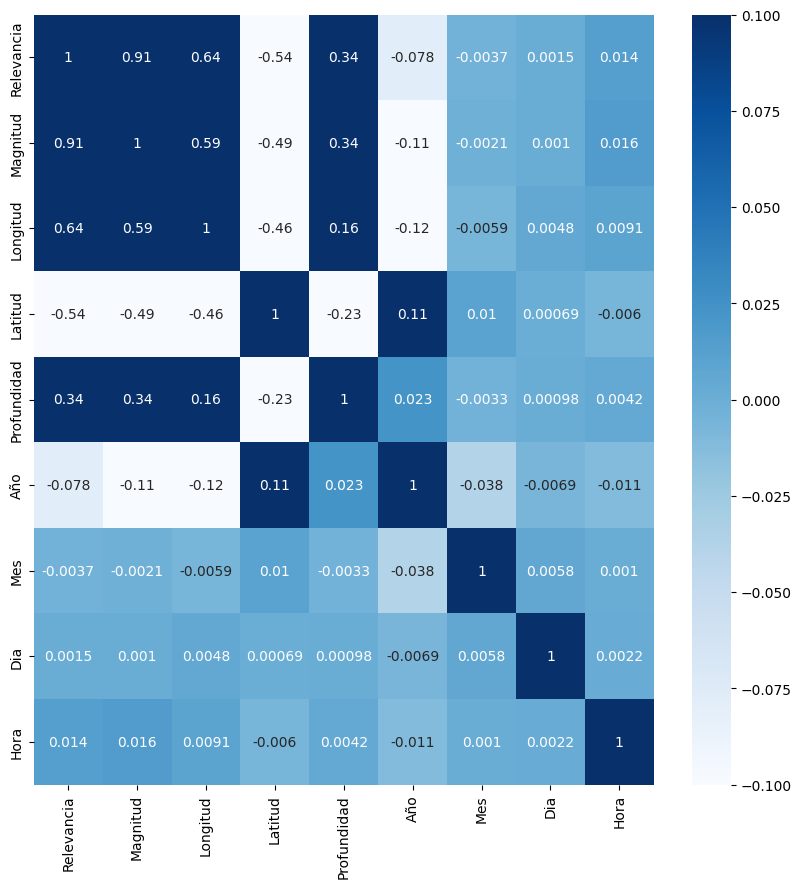

In [40]:
plt.figure(figsize=(10,10))

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-0.1, vmax=0.1)

# Mostrar gráfico
plt.show()

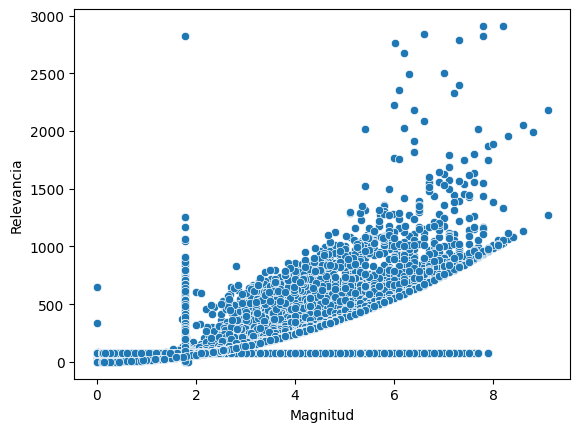

In [41]:
# Correlación de Magnitud y Relevancia
sns.scatterplot(x='Magnitud',y='Relevancia',data=df)
plt.show()

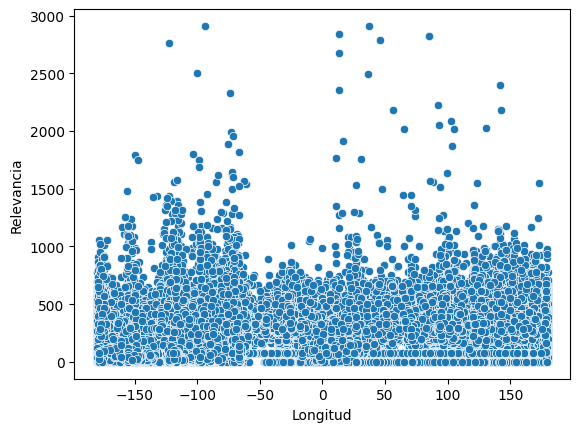

In [44]:
sns.scatterplot(x='Longitud',y='Relevancia',data=df)
plt.show()

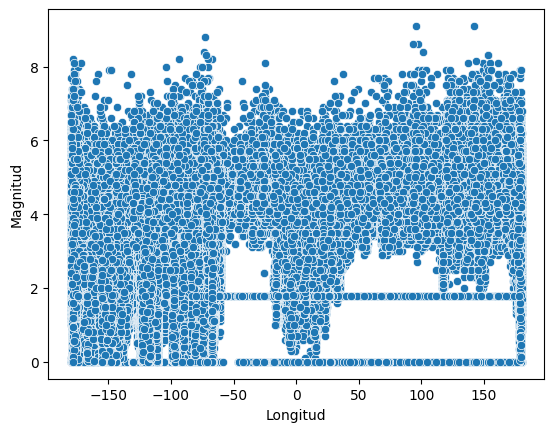

In [45]:
sns.scatterplot(x='Longitud',y='Magnitud',data=df)
plt.show()

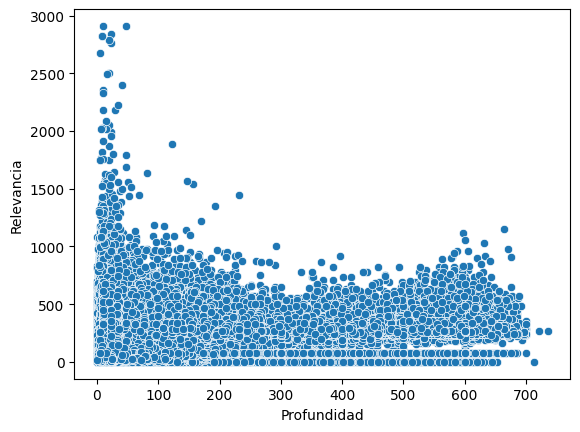

In [46]:
sns.scatterplot(x='Profundidad',y='Relevancia',data=df)
plt.show()

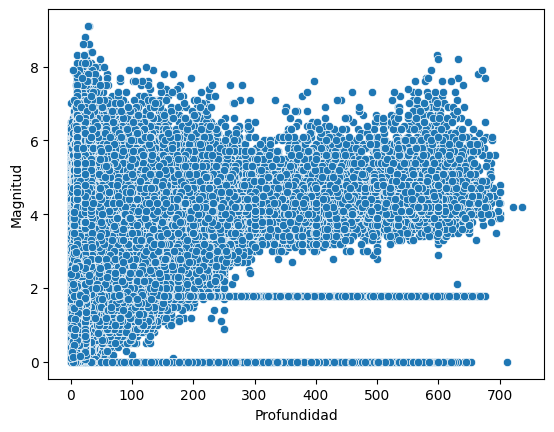

In [48]:
sns.scatterplot(x='Profundidad',y='Magnitud',data=df)
plt.show()

5. Análisis de Valores Faltantes

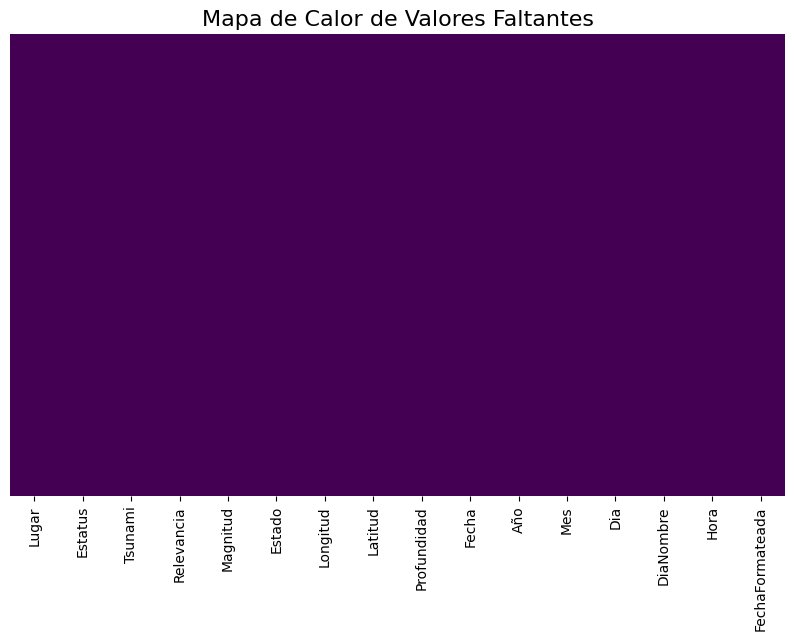

In [4]:
plt.figure(figsize=(10, 6))

# Crear un mapa de calor para los valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)

# Añadir título
plt.title("Mapa de Calor de Valores Faltantes", fontsize=16)

# Mostrar el gráfico
plt.show()

In [5]:
print(df.isnull().sum())

Lugar              0
Estatus            0
Tsunami            0
Relevancia         0
Magnitud           0
Estado             0
Longitud           0
Latitud            0
Profundidad        0
Fecha              0
Año                0
Mes                0
Dia                0
DiaNombre          0
Hora               0
FechaFormateada    0
dtype: int64


6. Relaciones entre variables categóricas y variables numéricas

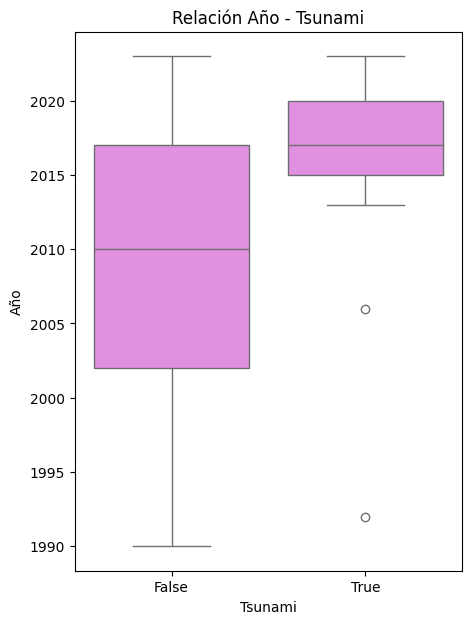

In [12]:
# Relación Año - Tsunami
plt.figure(figsize=(5, 7)) 
sns.boxplot(x = 'Tsunami', y = 'Año', data = df, color='violet')

plt.title('Relación Año - Tsunami')
plt.xlabel('Tsunami')
plt.ylabel('Año')

plt.show()

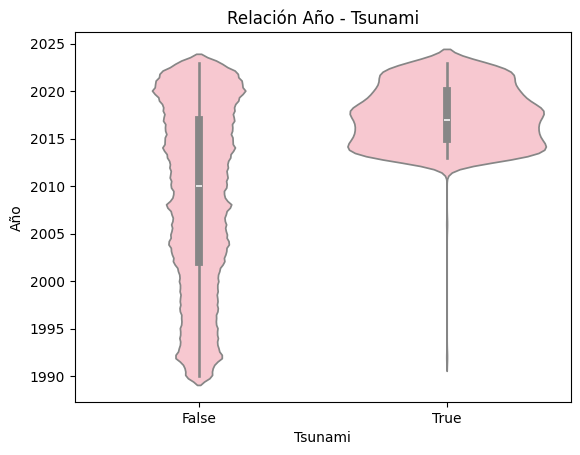

In [13]:
# Relación Año - Tsunami
sns.violinplot(x = 'Tsunami', y = 'Año', data = df, color='pink')

plt.title('Relación Año - Tsunami')
plt.show()

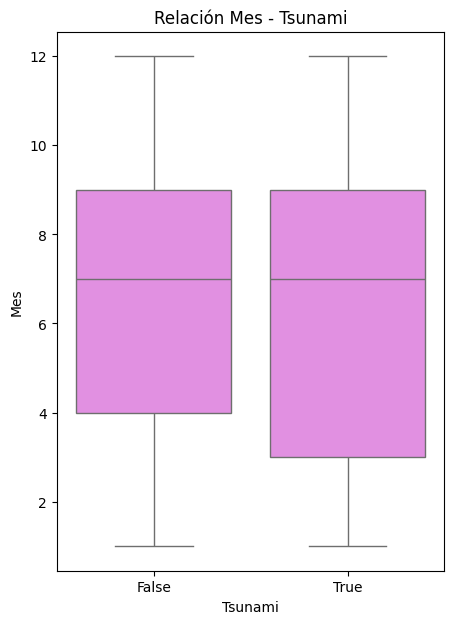

In [ ]:
# Relación Mes - Tsunami
plt.figure(figsize=(5, 7)) 
sns.boxplot(x = 'Tsunami', y = 'Mes', data = df, color='violet')

plt.title('Relación Mes - Tsunami')
plt.xlabel('Tsunami')
plt.ylabel('Mes')

plt.show()

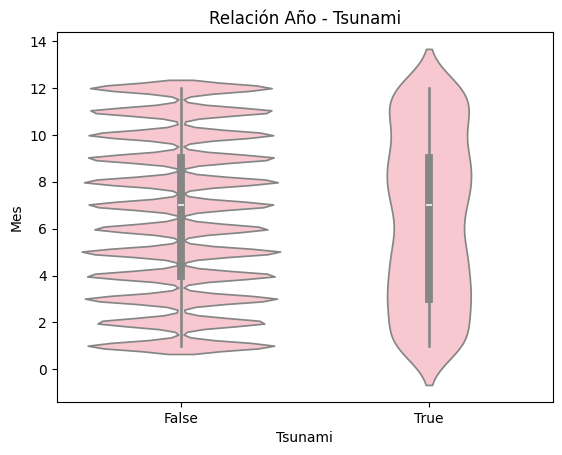

In [15]:
# Relación Mes - Tsunami
sns.violinplot(x = 'Tsunami', y = 'Mes', data = df, color='pink')

plt.title('Relación Año - Tsunami')
plt.show()

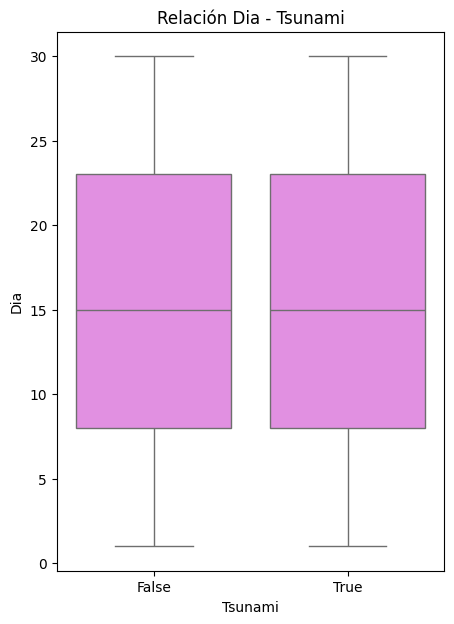

In [16]:
# Relación Dia - Tsunami
plt.figure(figsize=(5, 7)) 
sns.boxplot(x = 'Tsunami', y = 'Dia', data = df, color='violet')

plt.title('Relación Dia - Tsunami')
plt.xlabel('Tsunami')
plt.ylabel('Dia')

plt.show()

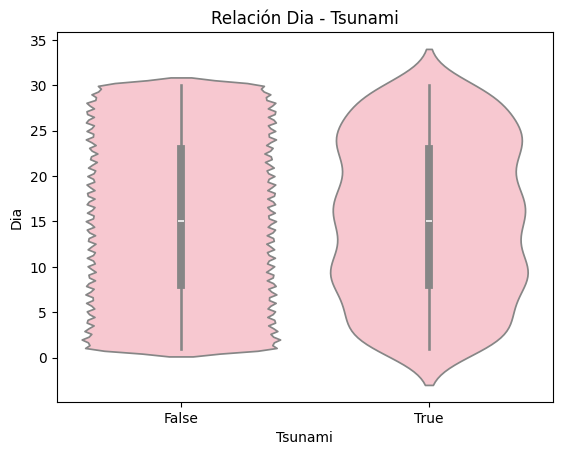

In [17]:
# Relación Dia - Tsunami
sns.violinplot(x = 'Tsunami', y = 'Dia', data = df, color='pink')

plt.title('Relación Dia - Tsunami')
plt.show()

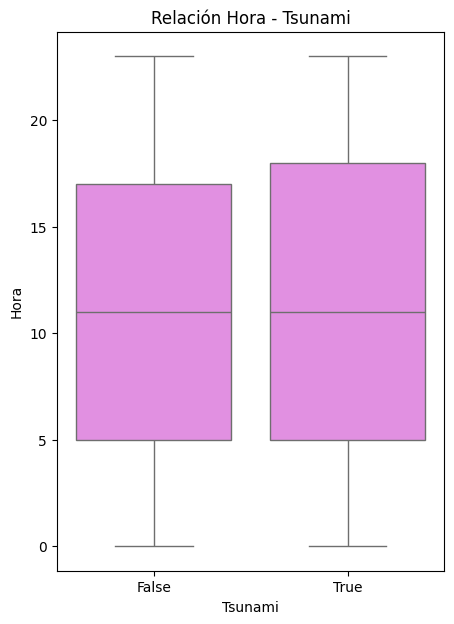

In [18]:
# Relación Hora - Tsunami
plt.figure(figsize=(5, 7)) 
sns.boxplot(x = 'Tsunami', y = 'Hora', data = df, color='violet')

plt.title('Relación Hora - Tsunami')
plt.xlabel('Tsunami')
plt.ylabel('Hora')

plt.show()

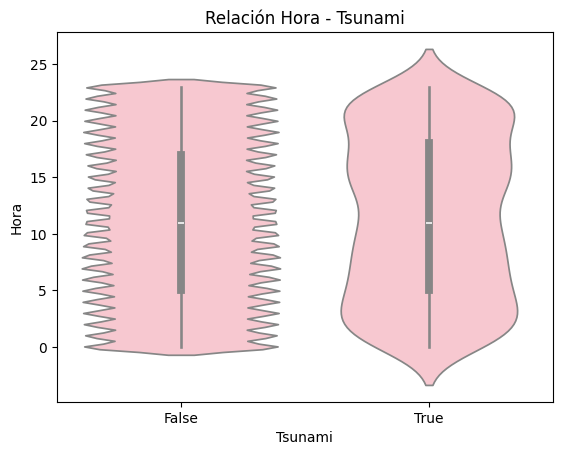

In [19]:
# Relación Hora - Tsunami
sns.violinplot(x = 'Tsunami', y = 'Hora', data = df, color='pink')

plt.title('Relación Hora - Tsunami')
plt.show()

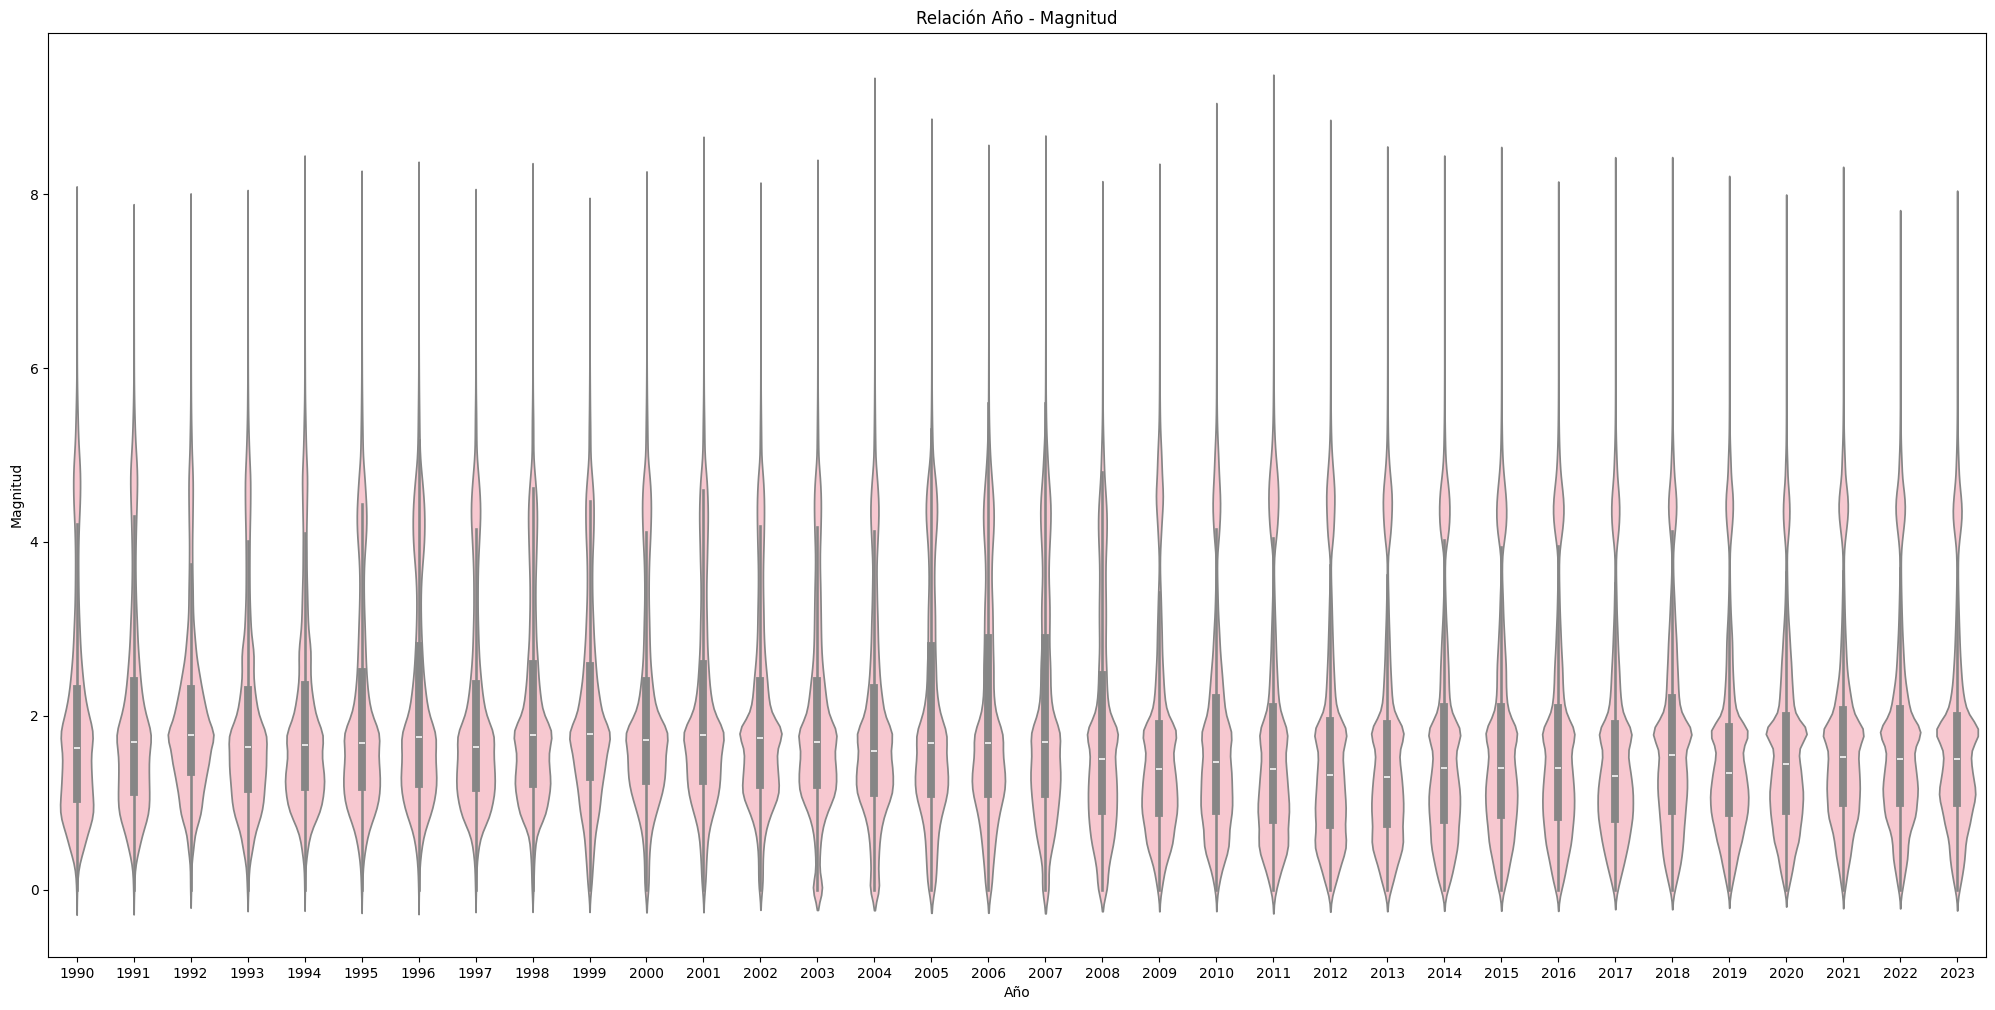

In [25]:
# Relación Dia - Tsunami
plt.figure(figsize=(25, 12)) 
sns.violinplot(x = 'Año', y = 'Magnitud', data = df, color='pink')

plt.title('Relación Año - Magnitud')
plt.show()

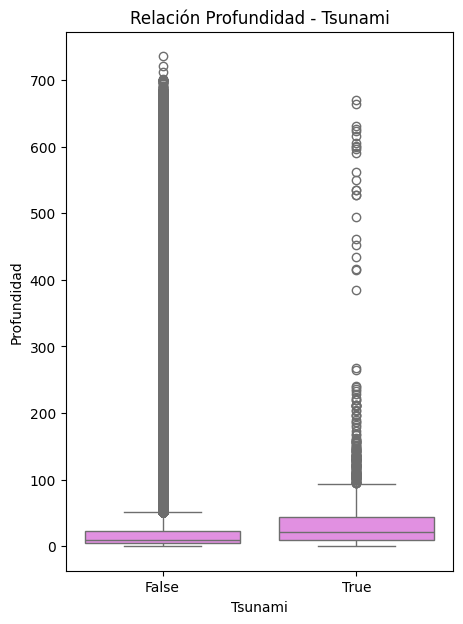

In [ ]:
# Relación Profundidad - Tsunami
plt.figure(figsize=(5, 7)) 
sns.boxplot(x = 'Tsunami', y = 'Profundidad', data = df, color='violet')

plt.title('Relación Profundidad - Tsunami')
plt.xlabel('Tsunami')
plt.ylabel('Profundidad')

plt.show()

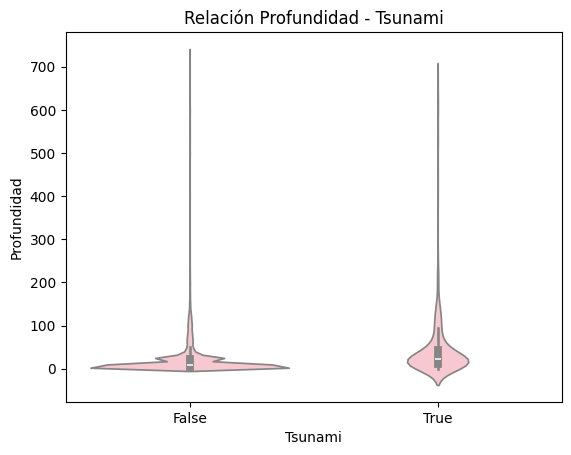

In [27]:
# Relación Profundidad - Tsunami
sns.violinplot(x = 'Tsunami', y = 'Profundidad', data = df, color='pink')

plt.title('Relación Profundidad - Tsunami')
plt.show()

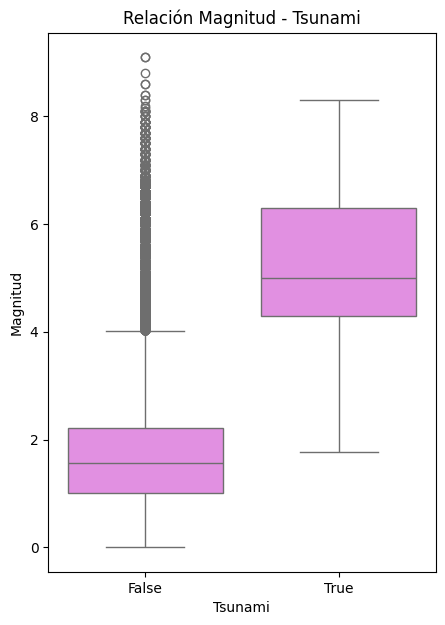

In [28]:
# Relación Magnitud - Tsunami
plt.figure(figsize=(5, 7)) 
sns.boxplot(x = 'Tsunami', y = 'Magnitud', data = df, color='violet')

plt.title('Relación Magnitud - Tsunami')
plt.xlabel('Tsunami')
plt.ylabel('Magnitud')

plt.show()

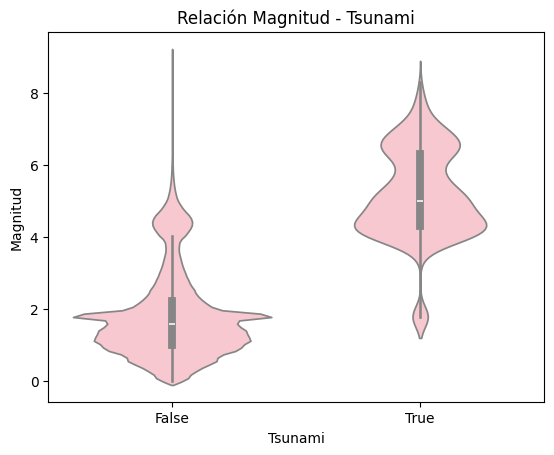

In [29]:
# Relación Magnitud - Tsunami
sns.violinplot(x = 'Tsunami', y = 'Magnitud', data = df, color='pink')

plt.title('Relación Magnitud - Tsunami')
plt.show()

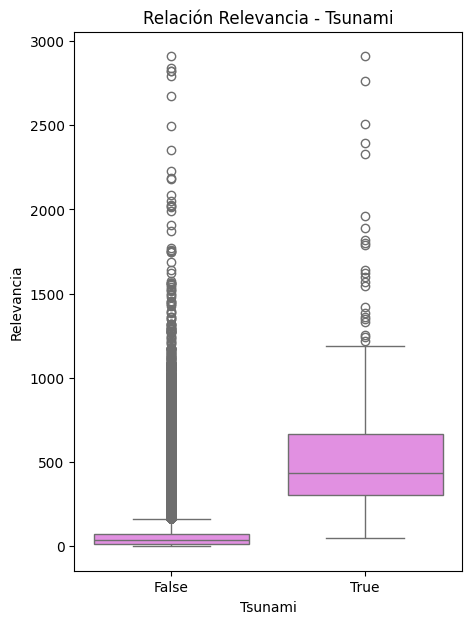

In [31]:
# Relación Relevancia - Tsunami
plt.figure(figsize=(5, 7)) 
sns.boxplot(x = 'Tsunami', y = 'Relevancia', data = df, color='violet')

plt.title('Relación Relevancia - Tsunami')
plt.xlabel('Tsunami')
plt.ylabel('Relevancia')

plt.show()